# Introduction

In this notebook we demonstrate the use of **BM25 (Best Matching 25)** Information Retrieval technique to make trace link recovery between Test Cases and Bug Reports.

We model our study as follows:

* Each bug report title, summary and description compose a single query.
* We use each test case content as an entire document that must be returned to the query made


# Import Libraries

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import pprint

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import br_feat_final_matrix_handler as b2f_handler

from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')

# Load Datasets

In [2]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


# Running BM25 Model - Exp-Vol UNION Oracle

In [3]:
models_runner_1 = Feat_BR_Models_Runner()

bm25_model_1 = models_runner_1.run_bm25_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

sim_thresh = 0.0

bm25_eval_t1 = evaluator_1.evaluate_model(model=bm25_model_1, top_value=1, sim_threshold=sim_thresh)
bm25_eval_t3 = evaluator_1.evaluate_model(model=bm25_model_1, top_value=3, sim_threshold=sim_thresh)
bm25_eval_t5 = evaluator_1.evaluate_model(model=bm25_model_1, top_value=5, sim_threshold=sim_thresh)
bm25_eval_t10 = evaluator_1.evaluate_model(model=bm25_model_1, top_value=10, sim_threshold=sim_thresh)

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running BM25 model -----
Expert and Volunteers Matrix UNION.shape: (91, 19)


# Similarity Matrix

In [4]:
aux_functions.highlight_df(bm25_model_1.get_sim_matrix().iloc[0:23, 0:14])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,46.17,84.3156,41.332,40.4685,6.20657,53.0895,11.0912,48.5354,4.07554,5.18518,56.8869,62.0284,69.3381,4.67167
windows_child_mode,23.155,71.6166,22.7814,21.7232,6.71277,39.888,7.68125,40.1719,5.73138,2.63173,51.3795,43.2361,59.9048,4.12943
apz_async_scrolling,12.7326,61.1786,18.713,14.4371,5.69423,52.2221,3.64381,41.6555,8.71421,4.65435,50.2258,43.4897,46.2715,6.10401
browser_customization,10.4111,27.9505,9.68006,12.7695,5.96623,16.4242,4.74153,16.4242,4.84751,4.84751,31.3279,31.4279,37.7537,6.8872
pdf_viewer,15.5965,30.1017,7.83097,10.6466,4.35054,17.5585,3.0775,17.5585,5.02301,3.9476,18.6829,31.4224,34.3601,5.68782
context_menu,86.6177,123.854,26.5629,24.9618,6.51118,42.4157,9.91306,47.0036,2.08933,11.3119,81.8746,58.4989,38.5947,5.43667
w10_comp,24.3176,35.7998,16.7532,14.769,5.5158,60.1221,8.44186,52.5012,4.86753,6.07843,68.9504,50.3324,47.7086,6.06727
tts_in_desktop,8.4998,24.0469,8.4998,11.0497,5.09988,28.1329,4.31265,26.2129,4.70626,4.70626,22.9494,16.606,31.2756,6.40622
tts_in_rm,8.52168,25.5749,8.52168,11.228,5.19863,27.2648,3.98316,25.8343,4.81392,4.81392,24.1431,20.0558,31.2106,6.47544


# Analysis of BR x Feat Generated Traces

In [5]:
handler = b2f_handler.BR_Feat_Final_Matrix_Handler(mode=b2f_handler.HandlerMode.LOAD)
br_2_features_matrix_final = handler.add_mappings_1(columns_names=['Features_IDs_bm25_t1_m',
                                                                   'Features_IDs_bm25_t3_m',
                                                                   'Features_IDs_bm25_t5_m',
                                                                   'Features_IDs_bm25_t10_m',
                                                                   'Features_IDs_orc'],
                                                    trace_matrices=[bm25_eval_t1['trace_links_df'],
                                                                    bm25_eval_t3['trace_links_df'],
                                                                    bm25_eval_t5['trace_links_df'],
                                                                    bm25_eval_t10['trace_links_df'],
                                                                    evaluator_1.get_oracle_df()],
                                                    is_from_model=True)

br_2_features_matrix_final = handler.add_mappings_2(dest_columns_names=['f_names_bm25_t1',
                                                                        'f_names_bm25_t3',
                                                                        'f_names_bm25_t5',
                                                                        'f_names_bm25_t10',
                                                                        'f_names_orc'],
                                                   orig_columns_names=['Features_IDs_bm25_t1_m',
                                                                       'Features_IDs_bm25_t3_m',
                                                                       'Features_IDs_bm25_t5_m',
                                                                       'Features_IDs_bm25_t10_m',
                                                                       'Features_IDs_orc'])
br_2_features_matrix_final.head(10)

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)
BR_2_Features Matrix Final.shape: (91, 5)


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_bm25_t1_m,Features_IDs_bm25_t3_m,Features_IDs_bm25_t5_m,Features_IDs_bm25_t10_m,Features_IDs_orc,f_names_bm25_t1,f_names_bm25_t3,f_names_bm25_t5,f_names_bm25_t10,f_names_orc
Bug_Number,,,,,,,,,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,6,1 6 7,1 2 6 7 19,1 2 3 5 6 7 12 14 17 19,6,[[context_menu]],"[[new_awesome_bar], [context_menu], [w10_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[[context_menu]]
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,6,1 2 6,1 2 3 6 19,1 2 3 6 12 13 14 17 18 19,4,[[context_menu]],"[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[[browser_customization]]
1257087,Middle mouse click on history item would not open,,,,,1,1 6 12,1 2 3 6 12,1 2 3 4 6 7 12 16 18 19,,[[new_awesome_bar]],"[[new_awesome_bar], [context_menu], [pointer_l...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[]
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,1,1 2 6,1 2 6 7 19,1 2 3 4 6 7 10 12 17 19,1,[[new_awesome_bar]],"[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[[new_awesome_bar]]
1267480,Intermittent browser/components/preferences/in...,,,,,18,2 13 18,1 2 6 13 18,1 2 3 4 6 7 9 13 16 18,,[[indicator_device_perm]],"[[windows_child_mode], [webm_eme], [indicator_...","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[]
1267501,New Private Browsing start-page overflows off ...,3,,3,,7,1 3 7,1 2 3 6 7,1 2 3 6 7 8 9 12 13 19,3,[[w10_comp]],"[[new_awesome_bar], [apz_async_scrolling], [w1...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,18,1 18 19,1 6 7 18 19,1 2 4 6 7 12 13 14 18 19,,[[indicator_device_perm]],"[[new_awesome_bar], [indicator_device_perm], [...","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [bro...",[]
1269485,New Private Browsing start-page has white/gray...,3,,3,,7,1 6 7,1 2 3 6 7,1 2 3 6 7 8 9 12 13 17,3,[[w10_comp]],"[[new_awesome_bar], [context_menu], [w10_comp]]","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,3,3 13 18,2 3 13 17 18,2 3 4 5 7 9 10 13 17 18,,[[apz_async_scrolling]],"[[apz_async_scrolling], [webm_eme], [indicator...","[[windows_child_mode], [apz_async_scrolling], ...","[[windows_child_mode], [apz_async_scrolling], ...",[]


# Analysis of Precision and Recall

## Union Strategy

Evaluating BM25 Model ----- 


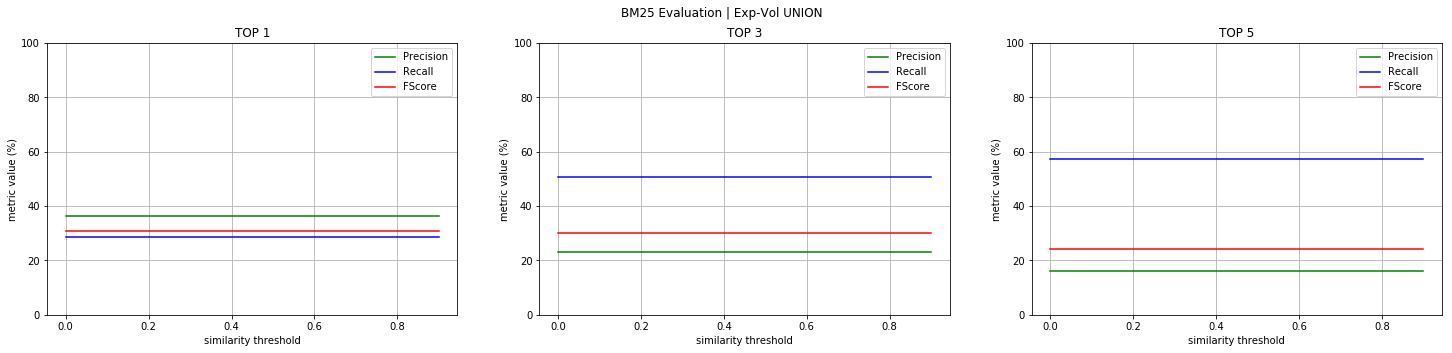

In [6]:
results = evaluator_1.run_evaluator(models=[bm25_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_1.plot_evaluations_2(title='BM25 Evaluation | Exp-Vol UNION', results=results)

## Intersection Streategy

Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Evaluating BM25 Model ----- 


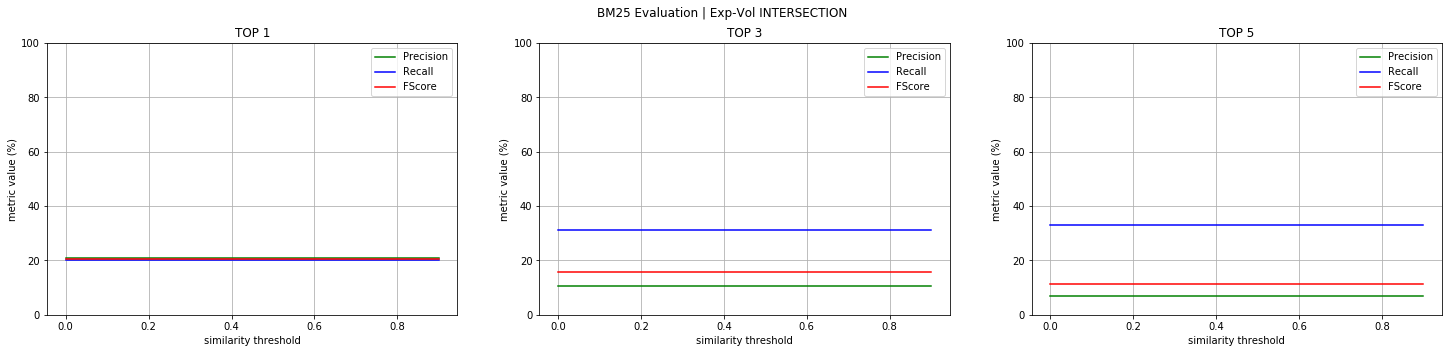

In [7]:
evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df().T)
results = evaluator_2.run_evaluator(models=[bm25_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_2.plot_evaluations_2(title='BM25 Evaluation | Exp-Vol INTERSECTION', results=results)

## Expert-Only Streategy

Feat_BR Expert Matrix shape: (91, 19)
Evaluating BM25 Model ----- 


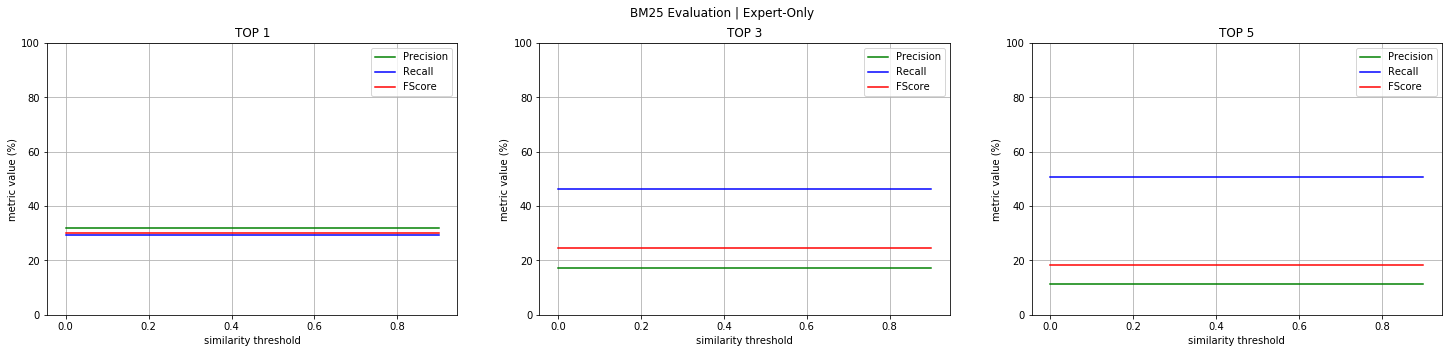

In [8]:
evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_df().T)
results = evaluator_3.run_evaluator(models=[bm25_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_3.plot_evaluations_2(title='BM25 Evaluation | Expert-Only', results=results)

## Volunteers-Only Streategy

Feat_BR Volunteers Matrix shape: (91, 19)
Evaluating BM25 Model ----- 


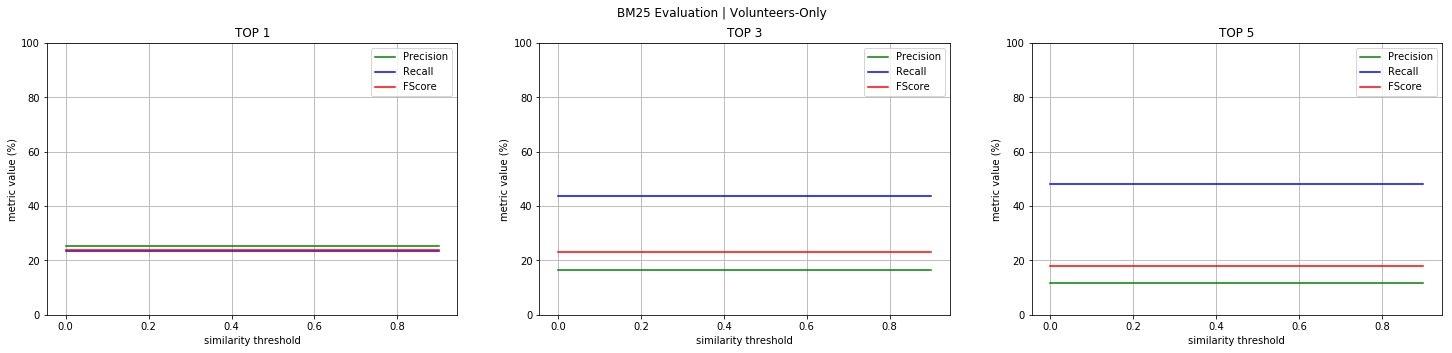

In [9]:
evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T)
results = evaluator_4.run_evaluator(models=[bm25_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_4.plot_evaluations_2(title='BM25 Evaluation | Volunteers-Only', results=results)